In [1]:
# standard libraries
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal, norm
from scipy import linalg, stats
from particles import resampling as rs
import time
import importlib
import sys
sys.path.append('..')

import MultivariateGaussianAlgorithms as algo
import utils as u
importlib.reload(algo)
importlib.reload(u)

<module 'utils' from '/Users/francescacrucinio/Documents/PAPERS/SUBMITTED/SMC-WFR/Gaussian/../utils.py'>

In [2]:
def KL(mu0, Sigma0, mu1, Sigma1):
    """
    Computes KL(N0 || N1) for multivariate Gaussians.
    
    Parameters
    ----------
    mu0 : (k,) array_like
        Mean vector of distribution 0.
    Sigma0 : (k,k) array_like
        Covariance matrix of distribution 0.
    mu1 : (k,) array_like
        Mean vector of distribution 1.
    Sigma1 : (k,k) array_like
        Covariance matrix of distribution 1.
    
    Returns
    -------
    float
        KL divergence KL(N0 || N1).
    """
    mu0 = np.asarray(mu0)
    mu1 = np.asarray(mu1)
    Sigma0 = np.asarray(Sigma0)
    Sigma1 = np.asarray(Sigma1)
    
    k = mu0.shape[0]

    # Compute inverse and determinants
    invSigma1 = np.linalg.inv(Sigma1)
    detSigma0 = np.linalg.det(Sigma0)
    detSigma1 = np.linalg.det(Sigma1)

    # Mahalanobis term
    diff = mu1 - mu0
    mahal = diff.T @ invSigma1 @ diff

    # Trace term
    trace_term = np.trace(invSigma1 @ Sigma0)

    # KL divergence
    kl = 0.5 * (trace_term + mahal - k + np.log(detSigma1 / detSigma0))

    return kl

In [3]:
d = 20

In [4]:
ms = 20*np.ones(d)
Sigmas = 5*np.eye(d)
mu0 = np.zeros(d)
Sigma0 = np.eye(d)

In [5]:
Sigmas_inv = linalg.inv(Sigmas)

## Algorithms

In [6]:
N = 1000
X0 = np.random.multivariate_normal(np.zeros(d), np.eye(d), size = N)
gamma = 0.01

In [7]:
Niter = 1000

In [8]:
### SMC-WFR
wfr_x, wfr_w, kl_wfr = algo.SMC_WFR(gamma, Niter, ms, Sigmas, Sigmas_inv, X0, 1)
### SMC-WFR with exact weights
wfr_x_exact, wfr_w_exact, m_splitting, C_splitting = algo.SMC_WFR_exactW(gamma, Niter, ms, Sigmas, Sigmas_inv, X0, 1)

In [9]:
kl_wfr_exact = np.zeros(Niter)
kl_wfr_splitting = np.zeros(Niter)

In [10]:
for i in range(Niter):
    m = np.sum(wfr_x_exact[i,:]*wfr_w_exact[i,:], axis = 1)
    C = np.cov(wfr_x_exact[i,:], aweights = wfr_w_exact[i,:], bias = True)
    kl_wfr_exact[i] = KL(m, C, ms, Sigmas)
    kl_wfr_splitting[i] = KL(m_splitting[i, :], C_splitting[i, :], ms, Sigmas)

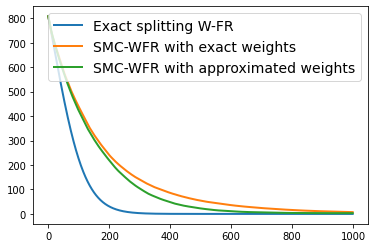

In [11]:
plt.plot(kl_wfr_splitting, label = 'Exact splitting W-FR', lw = 2)
plt.plot(kl_wfr_exact, label = 'SMC-WFR with exact weights', lw = 2)
plt.plot(kl_wfr, label = 'SMC-WFR with approximated weights', lw = 2)
plt.legend(fontsize = 14)